In [13]:
%pip install catboost
%pip install xgboost
%pip install seaborn
%pip install scikit-learn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import catboost as cb
import warnings

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [14]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [15]:
data = train_data.copy()

In [16]:
data.shape

(159256, 24)

In [17]:
data.isna().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [19]:
data.drop_duplicates(inplace=True)

In [20]:
desc = pd.DataFrame(round(data.describe().T, 2))
desc

,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.50,45973.39,0.0,39813.75,79627.5,119441.25,159255.0
age,159256.0,44.31,11.84,20.0,40.00,40.0,55.00,85.0
height(cm),159256.0,165.27,8.82,135.0,160.00,165.0,170.00,190.0
weight(kg),159256.0,67.14,12.59,30.0,60.00,65.0,75.00,130.0
waist(cm),159256.0,83.00,8.96,51.0,77.00,83.0,89.00,127.0
eyesight(left),159256.0,1.01,0.40,0.1,0.80,1.0,1.20,9.9
eyesight(right),159256.0,1.00,0.39,0.1,0.80,1.0,1.20,9.9
hearing(left),159256.0,1.02,0.15,1.0,1.00,1.0,1.00,2.0
hearing(right),159256.0,1.02,0.15,1.0,1.00,1.0,1.00,2.0
systolic,159256.0,122.50,12.73,77.0,114.00,121.0,130.00,213.0


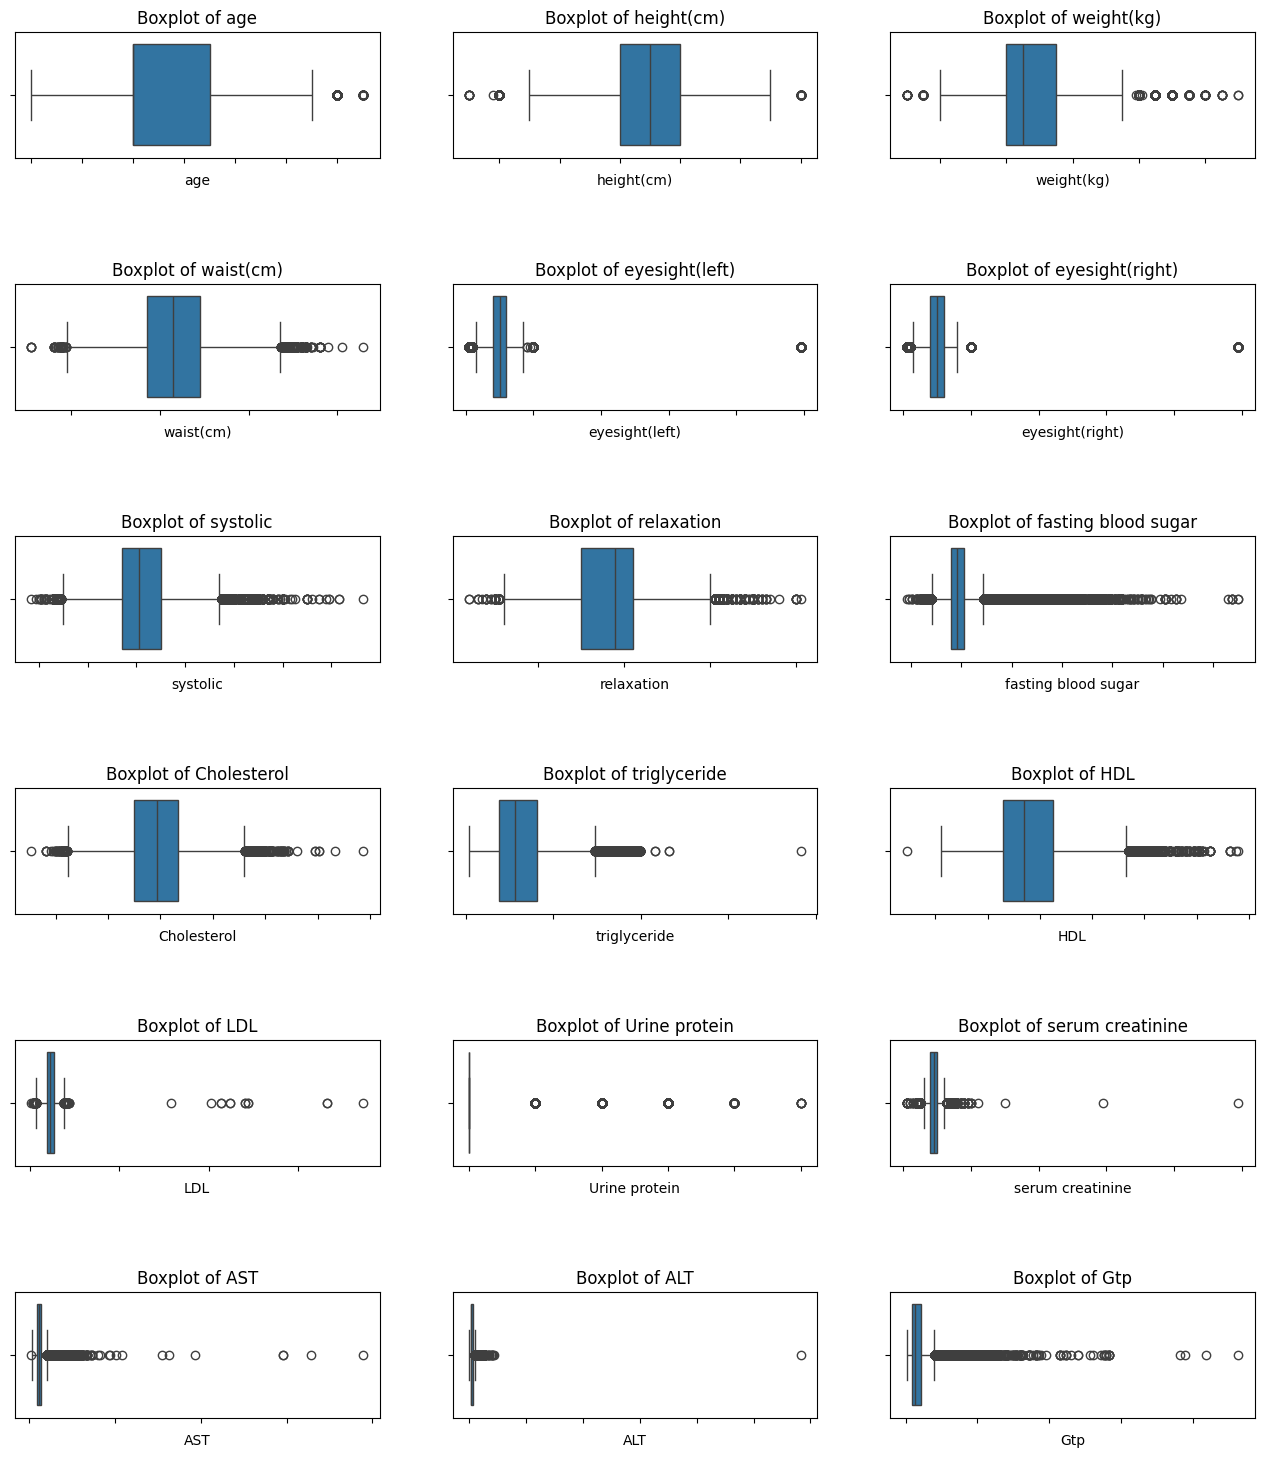

In [21]:
columns_to_plot = [
    'age',
    'height(cm)',
    'weight(kg)',
    'waist(cm)',
    'eyesight(left)',
    'eyesight(right)',
    'systolic',
    'relaxation',
    'fasting blood sugar',
    'Cholesterol',
    'triglyceride',
    'HDL',
    'LDL',
    'Urine protein',
    'serum creatinine',
    'AST',
    'ALT',
    'Gtp',
]

# Create a single large subplot to display all boxplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16, 18))
fig.subplots_adjust(hspace=1)

# For loop to draw Seaborn boxplot graphs and remove outliers based on Z-scores
for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, 3)

    # Draw Seaborn boxplot graph
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')
    axes[row, col].set_xticklabels([])  # Remove labels on x-axis

    # Calculate Z-scores for the column
    z_scores = np.abs(stats.zscore(data[column]))

    # Remove rows with Z-scores greater than 3 standard deviations
    data = data[(z_scores <= 3)]

data.reset_index(drop=True, inplace=True)

In [22]:
desc2 = pd.DataFrame(round(data.describe().T, 2))
desc2

,count,mean,std,min,25%,50%,75%,max
id,143609.0,79555.35,45945.26,0.0,39764.0,79567.0,119304.0,159255.0
age,143609.0,44.15,11.66,20.0,40.0,40.0,55.0,75.0
height(cm),143609.0,165.15,8.82,139.0,160.0,165.0,170.0,190.0
weight(kg),143609.0,66.59,12.08,30.0,55.0,65.0,75.0,101.0
waist(cm),143609.0,82.55,8.67,56.5,77.0,83.0,88.3,109.2
eyesight(left),143609.0,1.00,0.31,0.1,0.8,1.0,1.2,2.0
eyesight(right),143609.0,1.00,0.31,0.1,0.8,1.0,1.2,2.0
hearing(left),143609.0,1.02,0.15,1.0,1.0,1.0,1.0,2.0
hearing(right),143609.0,1.02,0.15,1.0,1.0,1.0,1.0,2.0
systolic,143609.0,122.06,12.46,85.0,113.0,120.0,130.0,160.0


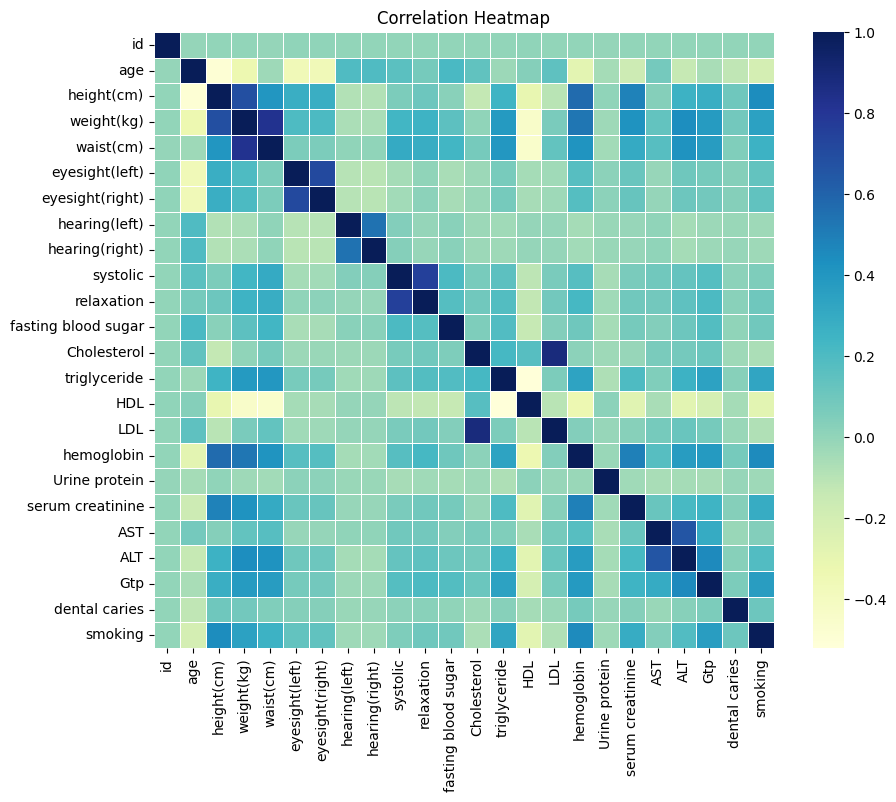

In [23]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='YlGnBu', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
X = data.drop(["smoking", "id"], axis=1)
y = data["smoking"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=30)

In [25]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBoostClassifier': XGBClassifier(),
    'CatBoostClassifier': cb.CatBoostClassifier(metric_period=100)
}

In [26]:
model_names = []
roc_auc_scores = []
accuracy_scores = []
confusion_matrices = []

-----RandomForestClassifier-----


<Figure size 1200x1000 with 0 Axes>

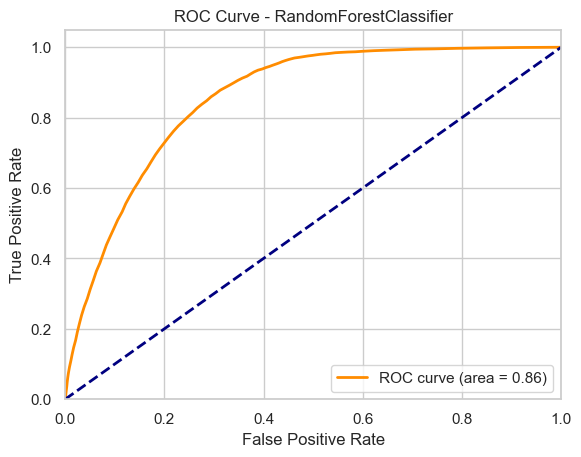

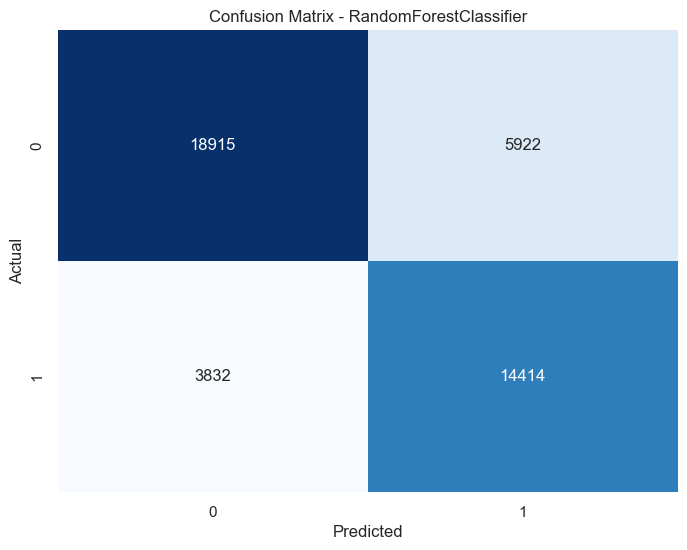

ROC AUC Score:  0.86
Accuracy Score:  0.77


-----AdaBoostClassifier-----


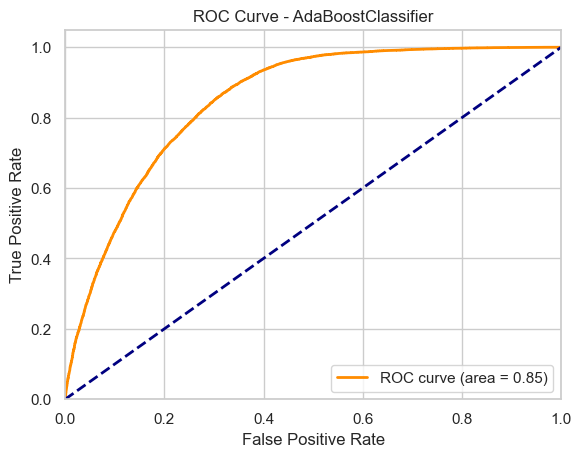

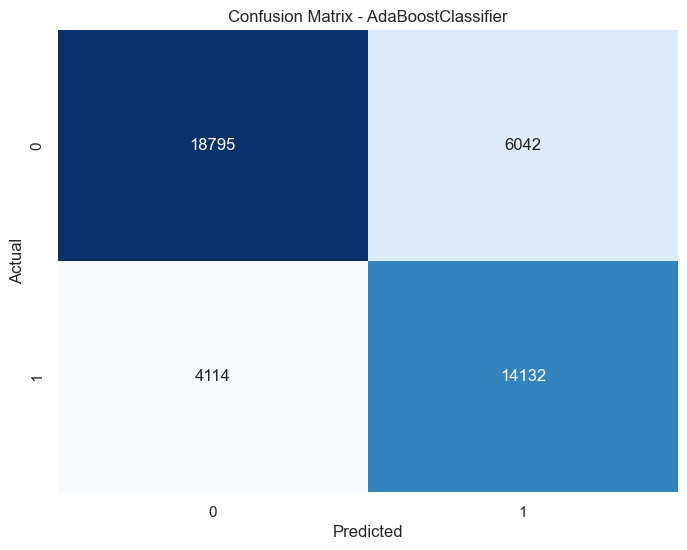

ROC AUC Score:  0.85
Accuracy Score:  0.76


-----GradientBoostingClassifier-----


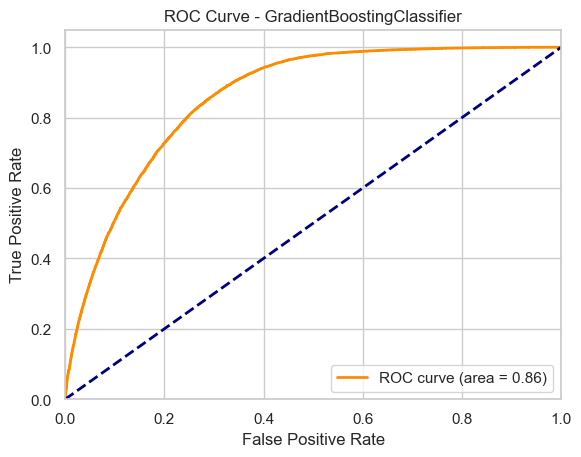

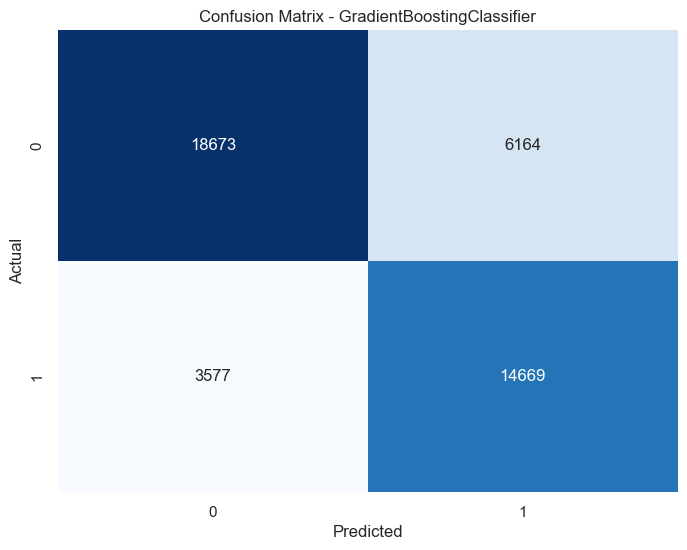

ROC AUC Score:  0.86
Accuracy Score:  0.77


-----XGBoostClassifier-----


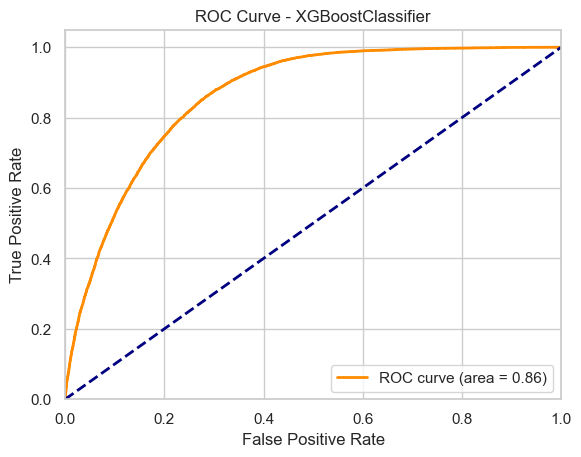

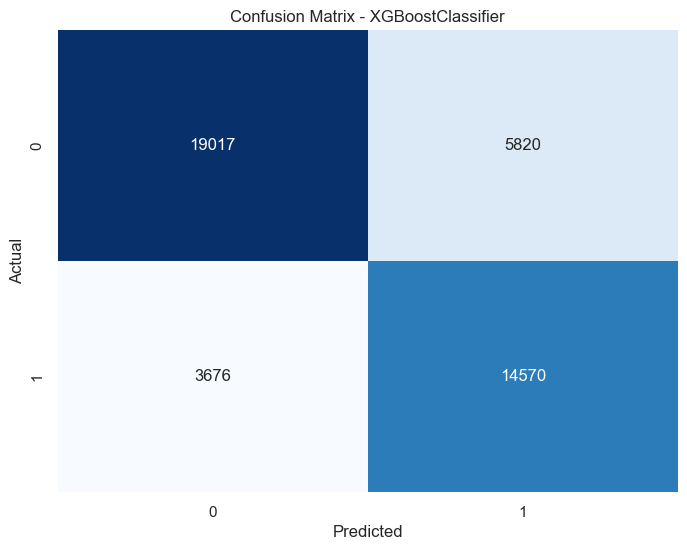

ROC AUC Score:  0.86
Accuracy Score:  0.78


-----CatBoostClassifier-----
Learning rate set to 0.073775
0:	learn: 0.6548288	total: 154ms	remaining: 2m 33s
100:	learn: 0.4450665	total: 874ms	remaining: 7.78s
200:	learn: 0.4349604	total: 1.61s	remaining: 6.4s
300:	learn: 0.4278205	total: 2.31s	remaining: 5.37s
400:	learn: 0.4215085	total: 3s	remaining: 4.48s
500:	learn: 0.4157542	total: 3.7s	remaining: 3.68s
600:	learn: 0.4103882	total: 4.37s	remaining: 2.9s
700:	learn: 0.4052267	total: 5.04s	remaining: 2.15s
800:	learn: 0.4004161	total: 5.72s	remaining: 1.42s
900:	learn: 0.3957858	total: 6.42s	remaining: 705ms
999:	learn: 0.3910979	total: 7.1s	remaining: 0us


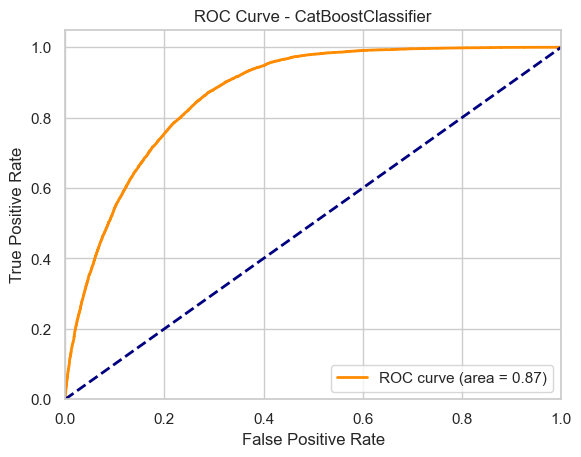

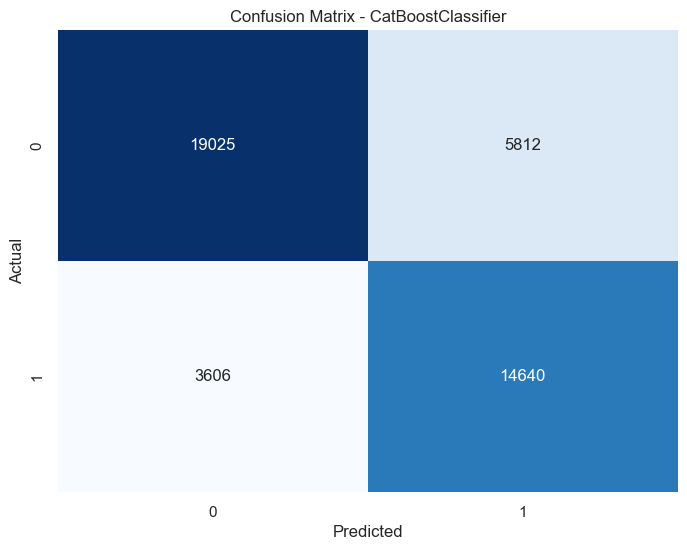

ROC AUC Score:  0.87
Accuracy Score:  0.78




In [27]:
plt.figure(figsize=(12, 10))
sns.set(font_scale=1)
sns.set_style("whitegrid")

for model_name, model_instance in models.items():
    print(f"-----{model_name}-----")

    model_instance.fit(X_train, y_train)
    y_prob = model_instance.predict_proba(
        X_test)[:, 1]  # Predict probability for class 1
    roc_auc = roc_auc_score(y_test, y_prob)
    y_pred = model_instance.predict(X_test)  # Predict class labels
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    model_names.append(model_name)
    roc_auc_scores.append(round(roc_auc, 2))
    accuracy_scores.append(round(accuracy, 2))
    confusion_matrices.append(cm)

    # Plot ROC curve with the model name in the title
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")

    # Display confusion matrix with Seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("ROC AUC Score: ", round(roc_auc, 2))
    print("Accuracy Score: ", round(accuracy, 2))
    print("\n")

C:\Users\duong\AppData\Local\Temp\ipykernel_9448\509906743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ROC AUC', y='Model', data=results, palette="rocket")


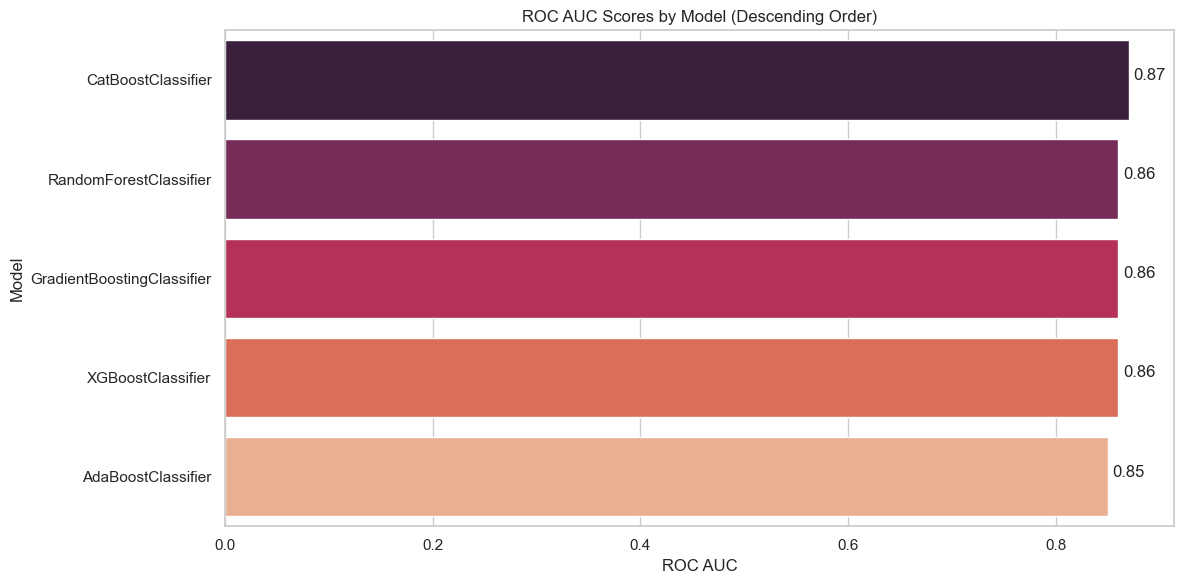

In [28]:
results = pd.DataFrame({'Model': model_names, 'ROC AUC': roc_auc_scores})
results = results.sort_values(by='ROC AUC', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='ROC AUC', y='Model', data=results, palette="rocket")

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width() +
                0.02, p.get_y() + p.get_height() / 2), ha='center')

plt.xlabel("ROC AUC")
plt.ylabel("Model")
plt.title("ROC AUC Scores by Model (Descending Order)")
plt.tight_layout()
plt.show()

In [29]:
best_model_name = results.iloc[0]['Model']
best_model = models[best_model_name]
best_model.fit(X, y)

Learning rate set to 0.085911
0:	learn: 0.6486925	total: 10.7ms	remaining: 10.7s
100:	learn: 0.4444569	total: 956ms	remaining: 8.51s
200:	learn: 0.4349533	total: 1.87s	remaining: 7.43s
300:	learn: 0.4285449	total: 2.73s	remaining: 6.34s
400:	learn: 0.4228260	total: 3.59s	remaining: 5.36s
500:	learn: 0.4176366	total: 4.53s	remaining: 4.51s
600:	learn: 0.4128696	total: 5.43s	remaining: 3.61s
700:	learn: 0.4083551	total: 6.32s	remaining: 2.69s
800:	learn: 0.4040619	total: 7.22s	remaining: 1.79s
900:	learn: 0.3999546	total: 8.13s	remaining: 893ms
999:	learn: 0.3961067	total: 8.99s	remaining: 0us


In [30]:
y_prob = best_model.predict_proba(test_data)[:, 1]

In [31]:
submission = pd.DataFrame({'id': test_data['id'], 'smoking': y_prob.round(2)})
submission.head(15)

,id,smoking
0,159256,0.61
1,159257,0.32
2,159258,0.52
3,159259,0.02
4,159260,0.59
5,159261,0.93
6,159262,0.50
7,159263,0.07
8,159264,0.14
9,159265,0.04


In [32]:
submission.to_csv('smoking_probabilities.csv', index=False)